<a href="https://colab.research.google.com/github/CatrielMiranda/TPMirandaCatrielCH/blob/main/TP_MIRANDACATRIELCH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El objetivo de este proyecto es analizar el éxito de la industria cinematográfica basándonos en un dataset que contiene información de más de 5,000 películas de The Movie Database (TMDb). Nos centraremos en entender qué factores influyen en el éxito financiero de una película y si la opinión de la audiencia se correlaciona con su popularidad.

La audiencia para este análisis son los ejecutivos de un estudio de cine que buscan tomar decisiones informadas sobre la producción de futuros proyectos. El análisis se presentará de forma clara y sin jerga técnica para que puedan entender los hallazgos y usarlos para mitigar riesgos y maximizar el potencial de ganancias.

 Preguntas/Hipótesis que queremos responder:

A través del análisis de los datos, buscaremos responder las siguientes preguntas clave:

Relación entre inversión y ganancia: ¿Existe una relación directa y fuerte entre el presupuesto de una película y sus ingresos? La hipótesis es que un mayor presupuesto suele llevar a mayores ingresos, pero no necesariamente a una mayor rentabilidad.

Rentabilidad por género: ¿Qué géneros cinematográficos son los más rentables para los estudios de cine? La hipótesis es que los géneros de acción y fantasía son los que más ganancias generan, a pesar de sus altos costos de producción.

Popularidad vs. calificación: ¿Las películas más populares entre el público son también las mejor valoradas? La hipótesis es que la popularidad y la calificación promedio son dos métricas distintas y no siempre se correlacionan directamente, ya que una película puede ser popular sin ser aclamada por la crítica.

Evolución temporal: ¿Cómo han evolucionado los presupuestos y los ingresos promedio de las películas a lo largo del tiempo? La hipótesis es que ambos montos han aumentado de forma constante a lo largo de los años.

In [4]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
import pandas as pd

df = pd.read_csv('/tmdb_5000_movies[1].csv')
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [9]:
df['budget'] = df['budget'].replace(0, np.nan)
df['revenue'] = df['revenue'].replace(0, np.nan)

In [10]:
def parse_json_column(column):
    # Rellenar valores nulos con una lista vacía para evitar errores
    # y convertir los strings JSON en objetos de Python
    try:
        parsed_list = [json.loads(item) if isinstance(item, str) else [] for item in column]
        return [[entry['name'] for entry in row] for row in parsed_list]
    except json.JSONDecodeError:
        return []

df['genres_list'] = parse_json_column(df['genres'])
df['keywords_list'] = parse_json_column(df['keywords'])
df['production_companies_list'] = parse_json_column(df['production_companies'])

# 2.3. Creación de nuevas columnas (Feature Engineering)
# Convertir 'release_date' a formato de fecha
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year'] = df['release_date'].dt.year

# Calcular la ganancia y el retorno sobre la inversión (ROI)
df['profit'] = df['revenue'] - df['budget']
df['roi'] = df['revenue'] / df['budget']

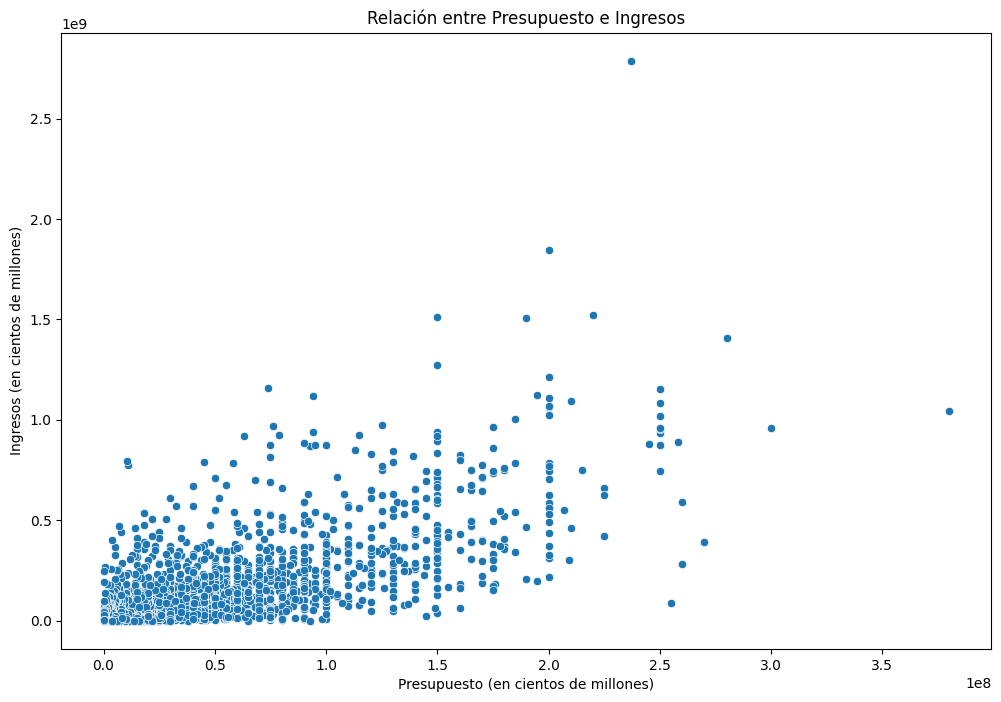

In [11]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='budget', y='revenue', data=df)
plt.title('Relación entre Presupuesto e Ingresos')
plt.xlabel('Presupuesto (en cientos de millones)')
plt.ylabel('Ingresos (en cientos de millones)')
plt.show()

In [12]:
correlation = df['budget'].corr(df['revenue'])
print(f'El coeficiente de correlación entre presupuesto e ingresos es: {correlation:.2f}')

El coeficiente de correlación entre presupuesto e ingresos es: 0.71


Insight – Relación entre Presupuesto e Ingresos

Lo que muestra el gráfico:

Se observa una tendencia positiva: a mayor presupuesto, en general, mayores ingresos.

Sin embargo, no todos los proyectos con alto presupuesto aseguran un ingreso elevado; hay una alta dispersión en los datos.

Existen algunos casos atípicos de películas con ingresos muy altos, incluso superiores a 2.500 millones, que se destacan como “éxitos extraordinarios”.

Resultado cuantitativo (correlación 0.71):

El coeficiente de correlación de 0.71 indica una relación fuerte y positiva entre el presupuesto y los ingresos.

Esto significa que invertir más en producción suele aumentar las posibilidades de obtener mayores ingresos, aunque no garantiza el éxito absoluto.

Implicancia para la empresa:

Las inversiones en proyectos con mayor presupuesto tienden a ser más rentables, pero no todos los casos lo confirman.

Es fundamental gestionar el riesgo: no todos los altos presupuestos retornan proporcionalmente.

Se sugiere analizar más variables (género, estrategia de marketing, época de estreno) para identificar qué factores adicionales potencian el éxito, además del presupuesto.

In [13]:
# Aplanar la lista de géneros para poder agrupar por género
all_genres = df.explode('genres_list')
genre_profit = all_genres.groupby('genres_list')['profit'].sum().sort_values(ascending=False).head(10)


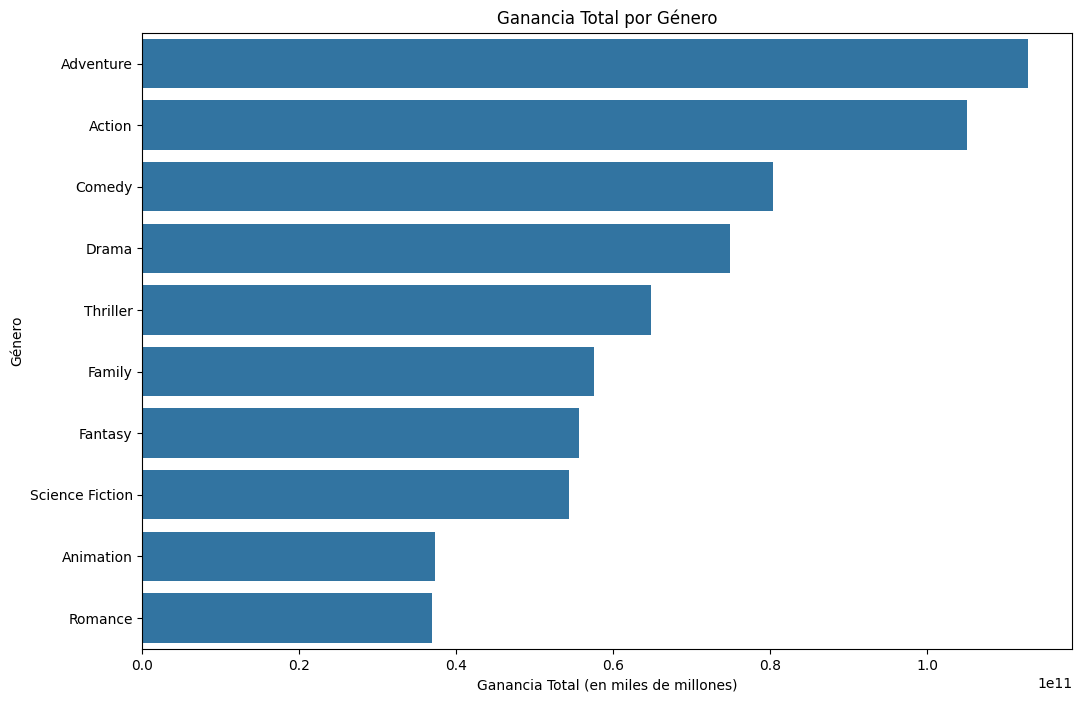

In [14]:
# Gráfico de barras para la ganancia total por género
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_profit.values, y=genre_profit.index)
plt.title('Ganancia Total por Género')
plt.xlabel('Ganancia Total (en miles de millones)')
plt.ylabel('Género')
plt.show()

Insight – Ganancia Total por Género

Lo que muestra el gráfico:

Los géneros Adventure y Action lideran ampliamente en ganancias totales, superando el billón (1e11) en ingresos acumulados.

Otros géneros como Comedy y Drama también generan altos ingresos, aunque con un volumen menor.

En el extremo inferior, géneros como Romance y Animation muestran las ganancias más bajas en comparación al resto.

Interpretación:

La preferencia del público y el potencial de taquilla se concentran en géneros con alto componente de espectáculo y entretenimiento masivo (Adventure, Action, Science Fiction).

Los géneros de nicho (Romance, Animation) tienen menor aporte a la rentabilidad global, aunque pueden ser estratégicos en audiencias específicas.

Implicancia para la empresa:

Para maximizar ingresos, es recomendable priorizar proyectos Adventure y Action, donde existe un historial de mayor retorno.

Sin embargo, diversificar hacia Comedy y Drama puede equilibrar el portafolio con géneros de éxito probado.

Los géneros menos rentables no deben descartarse del todo: pueden funcionar como parte de una estrategia de diferenciación o enfocarse en mercados segmentados (ejemplo: streaming o festivales).

In [15]:
# Agrupar por año y calcular el promedio de presupuesto e ingresos
df_by_year = df.groupby('release_year')[['budget', 'revenue']].mean().dropna()

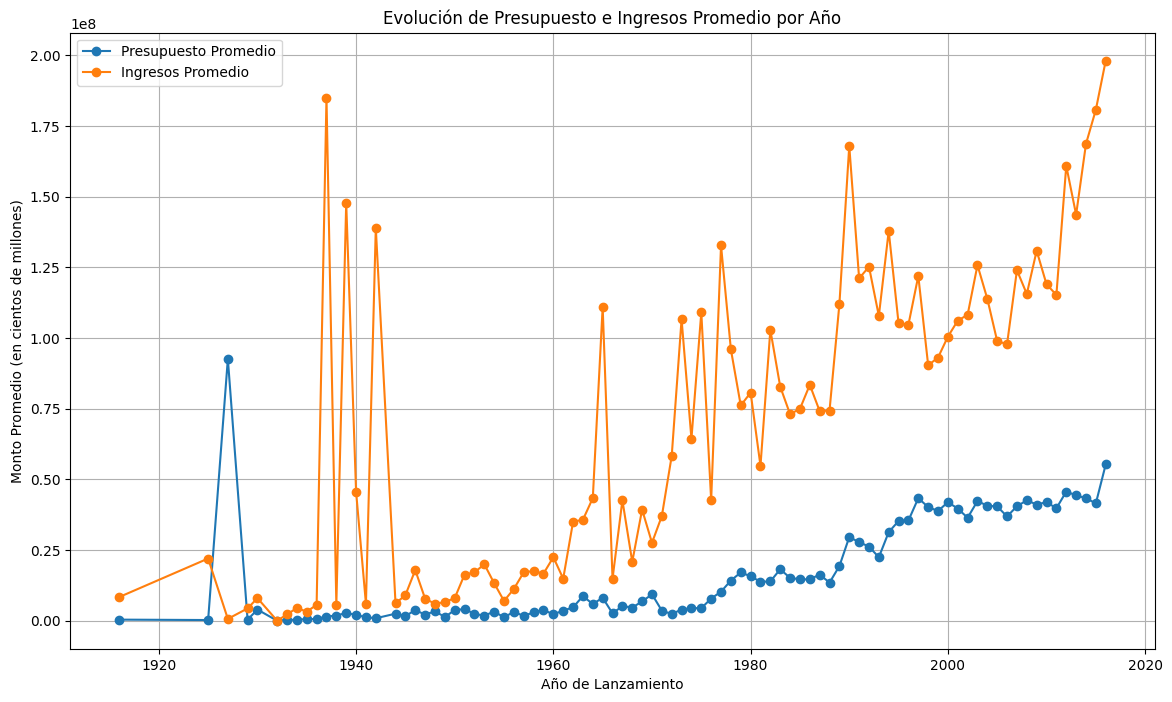

In [16]:
# Gráfico de líneas para ver la tendencia a lo largo del tiempo
plt.figure(figsize=(14, 8))
plt.plot(df_by_year.index, df_by_year['budget'], label='Presupuesto Promedio', marker='o')
plt.plot(df_by_year.index, df_by_year['revenue'], label='Ingresos Promedio', marker='o')
plt.title('Evolución de Presupuesto e Ingresos Promedio por Año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Monto Promedio (en cientos de millones)')
plt.legend()
plt.grid(True)
plt.show()

Insight – Evolución de Presupuesto e Ingresos Promedio por Año

Lo que muestra el gráfico:

Desde mediados del siglo XX, tanto el presupuesto promedio (azul) como los ingresos promedio (naranja) presentan una tendencia creciente.

A partir de los años 80 se observa un crecimiento más acelerado en ambos indicadores, con ingresos que superan ampliamente a los presupuestos.

En las últimas dos décadas (2000–2020), los ingresos muestran picos cada vez más altos, acercándose a los 2.000 millones promedio en algunos años, mientras que los presupuestos crecen de manera más gradual.

Interpretación:

El mercado cinematográfico se ha vuelto cada vez más rentable: los ingresos crecieron de manera mucho más pronunciada que los presupuestos.

Esto refleja el impacto de factores como la globalización de la industria, expansión de mercados internacionales, efectos tecnológicos y marketing masivo.

A pesar del incremento en costos de producción, la relación ingresos/presupuesto se ha mantenido positiva, lo que indica un buen retorno de inversión en general.

Implicancia para la empresa:

La industria muestra que invertir en producción tiene cada vez más potencial de retorno, especialmente desde el año 2000 en adelante.

El aumento sostenido de ingresos sugiere que los proyectos blockbuster (grandes producciones con alto presupuesto) han encontrado un mercado global dispuesto a consumirlos masivamente.

Esto refuerza la necesidad de invertir estratégicamente en producciones de alto impacto, apoyadas por campañas internacionales y tecnología innovadora.

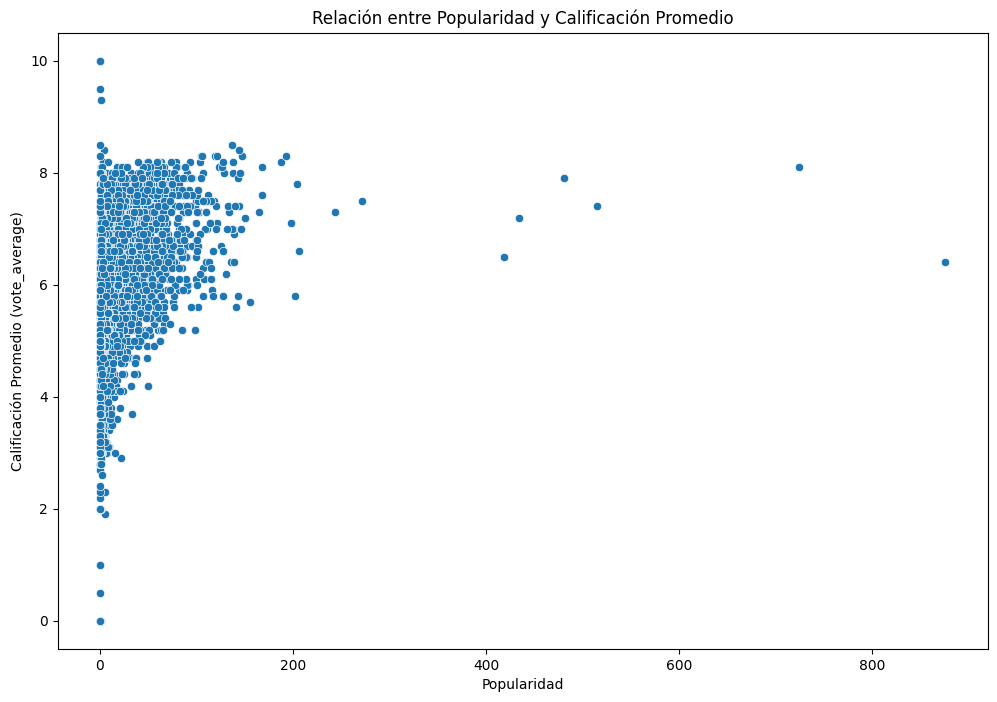

In [17]:
# Gráfico de dispersión para visualizar la relación entre popularidad y calificación
plt.figure(figsize=(12, 8))
sns.scatterplot(x='popularity', y='vote_average', data=df)
plt.title('Relación entre Popularidad y Calificación Promedio')
plt.xlabel('Popularidad')
plt.ylabel('Calificación Promedio (vote_average)')
plt.show()

In [18]:
# Calcular el coeficiente de correlación
correlation_pop_vote = df['popularity'].corr(df['vote_average'])
print(f'El coeficiente de correlación entre popularidad y calificación es: {correlation_pop_vote:.2f}')

El coeficiente de correlación entre popularidad y calificación es: 0.27


Insight – Relación entre Popularidad y Calificación Promedio

Lo que muestra el gráfico:

La mayoría de las películas se concentran en niveles bajos de popularidad (eje X), pero con calificaciones promedio que van de 5 a 8 puntos (eje Y).

Algunas películas alcanzan una popularidad muy alta (superior a 400 puntos), aunque no necesariamente tienen las calificaciones más elevadas.

Existen casos con alta calificación (8–10) pero baja popularidad, lo que indica que no todas las películas bien valoradas logran gran visibilidad.

Resultado cuantitativo (correlación 0.27):

El coeficiente de correlación de 0.27 indica una relación débil y positiva: las películas con mayor popularidad tienden a tener calificaciones algo mejores, pero la relación no es fuerte.

Esto significa que ser popular no garantiza tener buenas calificaciones, ni viceversa.

Implicancia para la empresa:

Para maximizar impacto, no basta con que una película sea de calidad (alta calificación), es necesario también impulsar su visibilidad y marketing para ganar popularidad.

Invertir en estrategias de distribución, campañas de publicidad y presencia en medios digitales puede transformar una película bien valorada en un éxito más visible.

A nivel estratégico, esto sugiere que la popularidad depende tanto de factores externos (promoción, timing, alcance) como de la calidad percibida.